# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Data Science Capstone
## Bank of Korea Monetary Policy Statement Analysis
## DATR02APAC, Justin Jimenez

### Final Project, Part 1: Proposal

<b>Draft a well-formed problem statement relevant to a business problem affecting your team, division, or organization.</b>

The ability to forecast the direction of monetary policy in an economy is a critical part of an economist's job. Central bankers, in setting a policy interest rate, aim to influence the main monetary variables in an economy.

Understanding the trajectory of the economic and market data is part of the story, but each economist's interpretation may differ. Being able to read central bankers' tea leaves can help to fill in the gap and understand their thinking. 

For my final project, I aim to use natural language processing algorithms to determine whether shifts in sentiment in the Bank of Korea's monetary policy statements can be a good predictor of future changes in its benchmark interest rate.

There are risks to this approach, including: 
* changes in the format of the statements over time;
* personnel shifts and the resultant shifts in thinking and styles (e.g., open communication vs. shocking markets);
* underlying changes in the economy that may not be captured by the central bank statement;
* nuances that may be lost in translation (the original documents are in Korean, then translated into English);
* natural language processing, in general, is difficult and prone to error.

However, the result, if successful, could be used as an input into a more comprehensive economic model -- and hopefully add explanatory power to such a model.

<b>Identify at least one relevant internal dataset and confirm that you have (or can get) the right access permissions.</b>

Bank of Korea benchmark interest rate decisions and monetary policy reports

* Link: http://www.bok.or.kr/eng/bbs/E0000628/list.do?menuNo=400025

### Final Project, Part 2: Brief

#### 1. Create an exploratory data analysis notebook.

In [466]:
#import all the packages
import pandas as pd
import numpy as np
import scipy as sp

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### 2. Perform statistical analysis, along with any visualizations.

In [467]:
#import data and check 
bok = pd.read_csv('./data_v2/bok_statements.csv', encoding = 'ISO-8859-1')
bok.head(n=15)

/Users/justinjimenez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,bok_stmt,rate,change,hold,cut,hike,survey,expected,unexpected,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,12/31/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/30/2018,The Monetary Policy Board of the Bank of Korea...,1.75,0.25,0.0,0.0,1.0,1.75,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0,1.50,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9/30/2018,NaN,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0,1.50,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0,1.50,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6/30/2018,NaN,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0,1.50,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4/30/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0,1.50,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3/31/2018,NaN,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [468]:
#Check data types and number of null objects 
bok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
date           232 non-null object
bok_stmt       224 non-null object
rate           231 non-null float64
change         224 non-null float64
hold           224 non-null float64
cut            224 non-null float64
hike           224 non-null float64
survey         149 non-null float64
expected       149 non-null float64
unexpected     149 non-null float64
Unnamed: 10    0 non-null float64
Unnamed: 11    0 non-null float64
Unnamed: 12    0 non-null float64
Unnamed: 13    0 non-null float64
Unnamed: 14    0 non-null float64
Unnamed: 15    0 non-null float64
Unnamed: 16    0 non-null float64
dtypes: float64(15), object(2)
memory usage: 136.0+ MB


In [469]:
#Check number of rows and columns
bok.shape

(1048575, 17)

In [470]:
#Too many columns and rows > delete excess
bok.tail()

,date,bok_stmt,rate,change,hold,cut,hike,survey,expected,unexpected,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Determine how to handle sampling or missing values.

In [471]:
share_null = (bok.isnull().sum()/bok.shape[0])*100
share_null.sort_values(ascending=False).head(35)

Unnamed: 16    100.000000
Unnamed: 15    100.000000
Unnamed: 14    100.000000
Unnamed: 13    100.000000
Unnamed: 12    100.000000
Unnamed: 11    100.000000
Unnamed: 10    100.000000
survey          99.985790
expected        99.985790
unexpected      99.985790
hike            99.978638
cut             99.978638
hold            99.978638
change          99.978638
bok_stmt        99.978638
rate            99.977970
date            99.977875
dtype: float64

In [472]:
#Delete the excess columns
bok.drop(["survey","expected","unexpected","Unnamed: 10", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16"], axis = 1, inplace = True)
bok.head(235)

,date,bok_stmt,rate,change,hold,cut,hike
0,12/31/2018,NaN,NaN,NaN,NaN,NaN,NaN
1,11/30/2018,The Monetary Policy Board of the Bank of Korea...,1.75,0.25,0.0,0.0,1.0
2,10/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0
3,9/30/2018,NaN,1.50,NaN,NaN,NaN,NaN
4,8/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0
5,7/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0
6,6/30/2018,NaN,1.50,NaN,NaN,NaN,NaN
7,5/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0
8,4/30/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0
9,3/31/2018,NaN,1.50,NaN,NaN,NaN,NaN


In [473]:
#Drop the excess rows
bok.drop(bok.index[232:], axis = 0, inplace = True)

#Drop rows where there is no cen
bok.dropna(subset=['bok_stmt'], inplace = True)

bok.tail()

,date,bok_stmt,rate,change,hold,cut,hike
227,2/29/2000,"Although the business upswing has continued, i...",5.00,0.25,0.0,0.0,1.0
228,1/31/2000,Although the real sector has continued to grow...,4.75,0.00,1.0,0.0,0.0
229,12/31/1999,Although the real economy showed a rapid expan...,4.75,0.00,1.0,0.0,0.0
230,11/30/1999,The real economy has contiued its rapid expans...,4.75,0.00,1.0,0.0,0.0
231,10/31/1999,"Recently, the real sector has been showing a ...",4.75,0.00,1.0,0.0,0.0


In [549]:
#Get summary statistics of the numeric variables
bok.describe()

,rate,change,hold,cut,hike,sentiment,sentiment_lead1,sentiment_lead2,sentiment_lead3,sentiment_lead4,sentiment_lead5,sentiment_lead6
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,223.000000,222.000000,221.000000,220.000000,219.000000,218.000000
mean,3.224330,-0.013393,0.821429,0.098214,0.080357,0.042720,0.042764,0.042724,0.042768,0.042775,0.042913,0.042994
std,1.239602,0.141419,0.383851,0.298271,0.272454,0.033267,0.033335,0.033405,0.033474,0.033551,0.033564,0.033620
min,1.250000,-1.000000,0.000000,0.000000,0.000000,-0.049107,-0.049107,-0.049107,-0.049107,-0.049107,-0.049107,-0.049107
25%,2.000000,0.000000,1.000000,0.000000,0.000000,0.022545,0.022456,0.022366,0.022277,0.022270,0.022456,0.022366
50%,3.250000,0.000000,1.000000,0.000000,0.000000,0.039544,0.039693,0.039544,0.039693,0.039544,0.039693,0.039877
75%,4.250000,0.000000,1.000000,0.000000,0.000000,0.061194,0.061276,0.061359,0.061442,0.061461,0.061480,0.061500
max,5.250000,0.250000,1.000000,1.000000,1.000000,0.141859,0.141859,0.141859,0.141859,0.141859,0.141859,0.141859


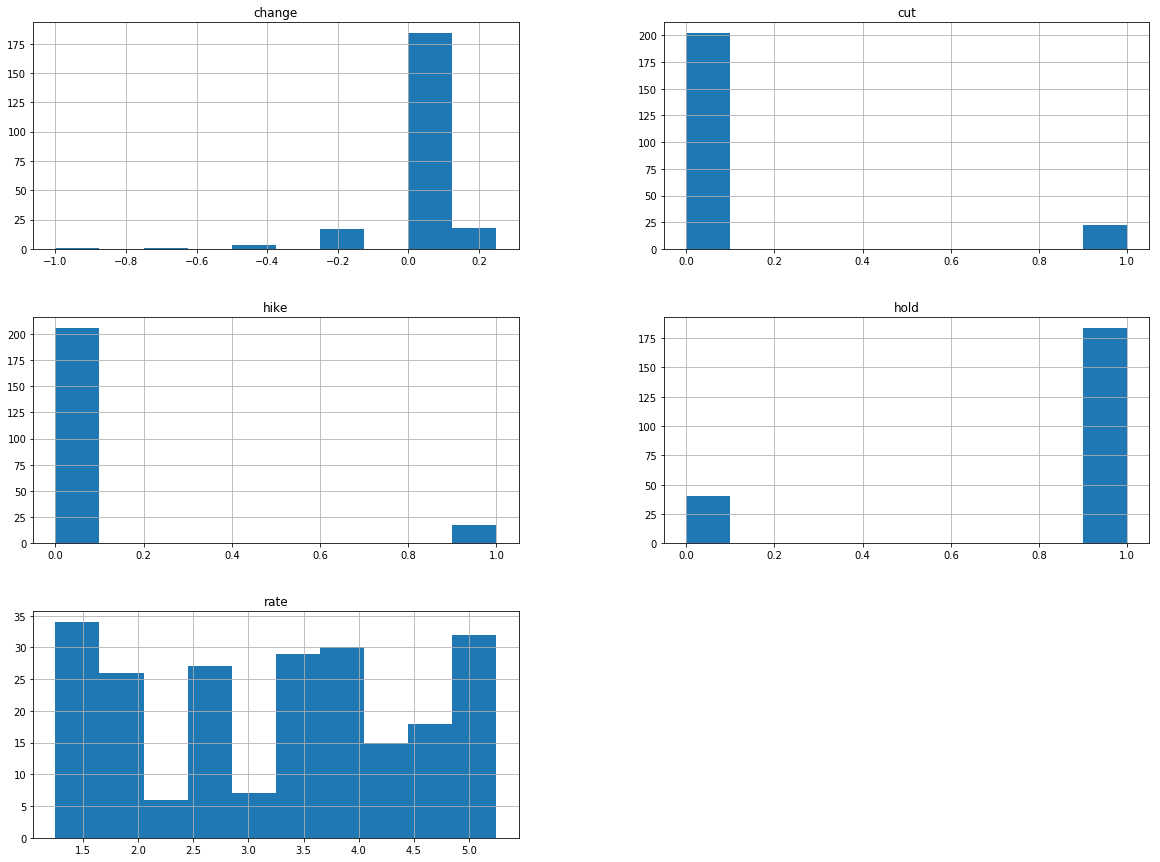

In [475]:
#Plot histogram for each numeric variable
bok.hist(bins=10, figsize=(20,15));

#### 4. Clearly identify shortcomings, assumptions, and next steps.

<b>Shortcomings:</b> One potential shortcoming of this data set is that missing data or data not captured in the data set (for example, exogenous/macroeconomic data) could be influencing the central bank's decisions. 

<b>Next steps:</b> The next step would be to process the data using a natural language processing algorithm. From there, I will need to divide the data into training and test data, run the appropriate model, score the model, and summarize my findings.

### Final Project, Part 3: Technical Notebook

In [476]:
#Import relevant packages for NLP and regression analysis 

import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords 
from textblob import TextBlob, Word

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score 

#### Sentiment Analysis Using TextBlob and Naive Bayes

In [477]:
# Define a function that accepts text and returns the polarity.
def detect_sentiment(bok_text): 
    return TextBlob(bok_text).sentiment.polarity

In [478]:
# Define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = str(text).lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [479]:
# Create a new DataFrame column for sentiment 
bok['sentiment'] = bok.bok_stmt.apply(detect_sentiment)
bok.head()

,date,bok_stmt,rate,change,hold,cut,hike,sentiment
1,11/30/2018,The Monetary Policy Board of the Bank of Korea...,1.75,0.25,0.0,0.0,1.0,0.032966
2,10/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0,0.051684
4,8/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0,0.033008
5,7/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0,0.041184
7,5/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0,0.012381


In [505]:
#Creating leading variables for bok_stmt, sentiment

#leading variables for bok_stmt
bok['bok_stmt_lead1'] = bok.bok_stmt.shift(-1)
bok['bok_stmt_lead2'] = bok.bok_stmt.shift(-2)
bok['bok_stmt_lead3'] = bok.bok_stmt.shift(-3)
bok['bok_stmt_lead4'] = bok.bok_stmt.shift(-4)
bok['bok_stmt_lead5'] = bok.bok_stmt.shift(-5)
bok['bok_stmt_lead6'] = bok.bok_stmt.shift(-6)

#leading variables for sentiment
bok['sentiment_lead1'] = bok.sentiment.shift(-1)
bok['sentiment_lead2'] = bok.sentiment.shift(-2)
bok['sentiment_lead3'] = bok.sentiment.shift(-3)
bok['sentiment_lead4'] = bok.sentiment.shift(-4)
bok['sentiment_lead5'] = bok.sentiment.shift(-5)
bok['sentiment_lead6'] = bok.sentiment.shift(-6)
bok.head()

,date,bok_stmt,rate,change,hold,cut,hike,sentiment,sentiment_lead1,sentiment_lead2,sentiment_lead3,sentiment_lead4,sentiment_lead5,sentiment_lead6,bok_stmt_lead1,bok_stmt_lead2,bok_stmt_lead3,bok_stmt_lead4,bok_stmt_lead5,bok_stmt_lead6
1,11/30/2018,The Monetary Policy Board of the Bank of Korea...,1.75,0.25,0.0,0.0,1.0,0.032966,0.051684,0.033008,0.041184,0.012381,0.025432,0.025257,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...
2,10/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0,0.051684,0.033008,0.041184,0.012381,0.025432,0.025257,0.027107,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...
4,8/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0,0.033008,0.041184,0.012381,0.025432,0.025257,0.027107,0.014046,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...
5,7/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0,0.041184,0.012381,0.025432,0.025257,0.027107,0.014046,0.019807,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...
7,5/31/2018,The Monetary Policy Board of the Bank of Korea...,1.50,0.00,1.0,0.0,0.0,0.012381,0.025432,0.025257,0.027107,0.014046,0.019807,0.004766,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...,The Monetary Policy Board of the Bank of Korea...


In [550]:
#Get summary statistics of the numeric variables, including newly created leading variables
bok.describe(exclude=None)

,rate,change,hold,cut,hike,sentiment,sentiment_lead1,sentiment_lead2,sentiment_lead3,sentiment_lead4,sentiment_lead5,sentiment_lead6
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,223.000000,222.000000,221.000000,220.000000,219.000000,218.000000
mean,3.224330,-0.013393,0.821429,0.098214,0.080357,0.042720,0.042764,0.042724,0.042768,0.042775,0.042913,0.042994
std,1.239602,0.141419,0.383851,0.298271,0.272454,0.033267,0.033335,0.033405,0.033474,0.033551,0.033564,0.033620
min,1.250000,-1.000000,0.000000,0.000000,0.000000,-0.049107,-0.049107,-0.049107,-0.049107,-0.049107,-0.049107,-0.049107
25%,2.000000,0.000000,1.000000,0.000000,0.000000,0.022545,0.022456,0.022366,0.022277,0.022270,0.022456,0.022366
50%,3.250000,0.000000,1.000000,0.000000,0.000000,0.039544,0.039693,0.039544,0.039693,0.039544,0.039693,0.039877
75%,4.250000,0.000000,1.000000,0.000000,0.000000,0.061194,0.061276,0.061359,0.061442,0.061461,0.061480,0.061500
max,5.250000,0.250000,1.000000,1.000000,1.000000,0.141859,0.141859,0.141859,0.141859,0.141859,0.141859,0.141859


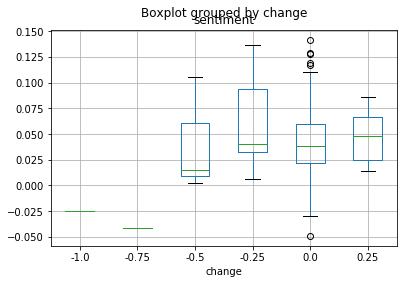

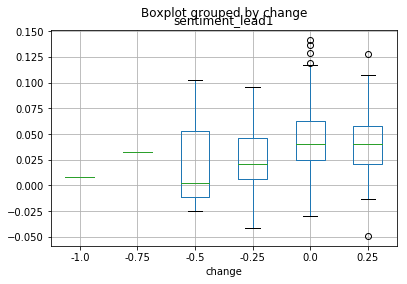

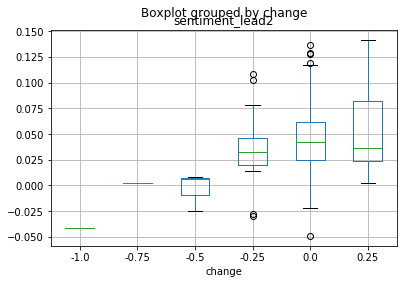

In [481]:
#Create boxplot to visualize sentiment by change in the benchmark interest rate 
bok.boxplot(column='sentiment', by='change');
bok.boxplot(column='sentiment_lead1', by='change');
bok.boxplot(column='sentiment_lead2', by='change');

/Users/justinjimenez/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


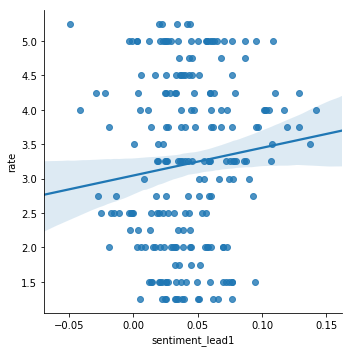

In [504]:
#Create scatterplot to show relationship between sentiment and benchmark interest rate
sns.lmplot(x='sentiment_lead1', y='rate', data=bok);

In [483]:
#Create correlation matrix
bok.corr()

,rate,change,hold,cut,hike,sentiment,sentiment_lead1,sentiment_lead2,sentiment_lead3,sentiment_lead4,sentiment_lead5,sentiment_lead6
rate,1.000000,0.055586,-0.075647,-0.005279,0.112356,0.094773,0.108289,0.136790,0.139241,0.148283,0.152894,0.160325
change,0.055586,1.000000,0.203572,-0.766009,0.551788,0.075327,0.128844,0.232134,0.030436,0.076021,0.073736,0.080976
hold,-0.075647,0.203572,1.000000,-0.707807,-0.633989,-0.085820,0.130537,0.079554,0.053648,0.057969,0.091723,-0.003028
cut,-0.005279,-0.766009,-0.707807,1.000000,-0.097552,0.068652,-0.166998,-0.164736,-0.019616,-0.071573,-0.088224,-0.046821
hike,0.112356,0.551788,-0.633989,-0.097552,1.000000,0.045752,-0.001042,0.068313,-0.054045,-0.003234,-0.032030,0.056925
sentiment,0.094773,0.075327,-0.085820,0.068652,0.045752,1.000000,0.368616,0.247152,0.238030,0.202086,0.028666,0.110957
sentiment_lead1,0.108289,0.128844,0.130537,-0.166998,-0.001042,0.368616,1.000000,0.369096,0.246863,0.238014,0.201327,0.028006
sentiment_lead2,0.136790,0.232134,0.079554,-0.164736,0.068313,0.247152,0.369096,1.000000,0.369587,0.246963,0.239653,0.202152
sentiment_lead3,0.139241,0.030436,0.053648,-0.019616,-0.054045,0.238030,0.246863,0.369587,1.000000,0.369596,0.246280,0.239169
sentiment_lead4,0.148283,0.076021,0.057969,-0.071573,-0.003234,0.202086,0.238014,0.246963,0.369596,1.000000,0.370113,0.246328


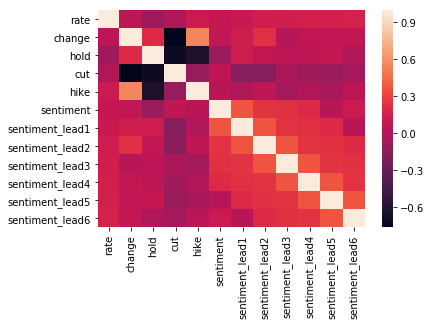

In [529]:
#Create heatmap based on correlation matrix
sns.heatmap(bok.corr());

In [564]:
#Define dependent/target variable and independent/feature variable
y = bok.hold
X = bok.bok_stmt_lead1

# Split the new DataFrame into training and testing sets (70/30 split).
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.3)

# Use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(analyzer=split_into_lemmas, stop_words='english')
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict whether central bank will hold or not based on previous meeting's statement.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print('Accuracy: ',(metrics.accuracy_score(y_test, y_pred_class)))

Accuracy:  0.7205882352941176


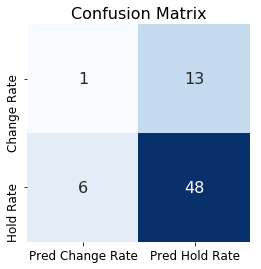

In [565]:
#Display confusion matrix
conmatrix = np.array(confusion_matrix(y_test, nb.predict(X_test_dtm)))
confusion = pd.DataFrame(conmatrix, index=['Change Rate', 'Hold Rate'],\
                     columns=['Pred Change Rate', 'Pred Hold Rate'])

plt.figure(figsize = (4,4))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 16},cmap='Blues',fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Confusion Matrix", fontsize=16);

In [542]:
#Print classification report 
print(classification_report(y_test, nb.predict(X_test_dtm)))

              precision    recall  f1-score   support

         0.0       0.14      0.07      0.10        14
         1.0       0.79      0.89      0.83        54

   micro avg       0.72      0.72      0.72        68
   macro avg       0.46      0.48      0.47        68
weighted avg       0.65      0.72      0.68        68

